In [1]:
%matplotlib inline
import sys
sys.path.append('..')
import spectra as sp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from brillouin import fit_file

In [3]:
l, b1, b2 = fit_file('../sample_data/test_full/04_04_09_08_16_01.DAT')

Loading file ... 
Peak width of about 5 (in x-data units)
Building model ... 
Peak 0: pos 4, height 1328840.0
Peak 1: pos 127, height 2072764.0
Peak 2: pos 253, height 2160177.0
Fitting Data...
[[Model]]
    (((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # function evals   = 102
    # data points      = 256
    # variables        = 10
    chi-square         = 2002206691828.564
    reduced chi-square = 8139051592.799
    Akaike info crit   = 5861.905
    Bayesian info crit = 5897.356
[[Variables]]
    bg_c0:         -35763.1112 +/- 6.53e+03 (18.27%) (init= 0)
    p0_sigma:       2.71828294 +/- 0.126746 (4.66%) (init= 2.5)
    p0_center:      5.44378331 +/- 0.083383 (1.53%) (init= 4)
    p0_amplitude:   1.7300e+07 +/- 5.86e+05 (3.39%) (init= 1.043668e+07)
    p1_sigma:       2.36890480 +/- 0.090097 (3.80%) (init= 2.5)
    p1_center:      127.865514 +/- 0.061600 (0.05%) (ini

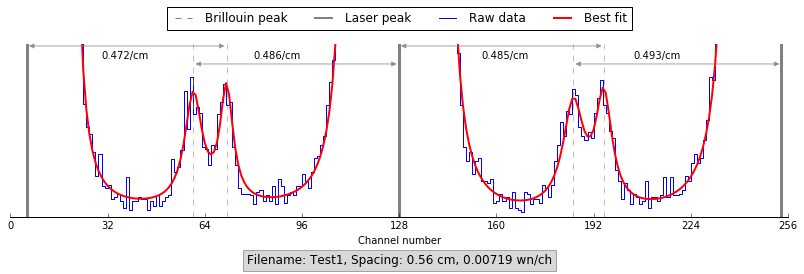

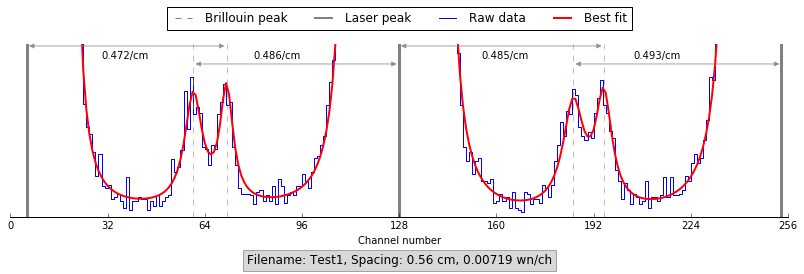

In [4]:
from brillouin import plot_fit, calculate_shifts
plot_fit(l, b1, b2, save_path=None, filename="Test1", crossed=True)

In [12]:
print l.out.fit_report()

[[Model]]
    (((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_')) + Model(lorentzian, prefix='p2_'))
[[Fit Statistics]]
    # function evals   = 102
    # data points      = 256
    # variables        = 10
    chi-square         = 2002206691828.564
    reduced chi-square = 8139051592.799
    Akaike info crit   = 5861.905
    Bayesian info crit = 5897.356
[[Variables]]
    bg_c0:         -35763.1112 +/- 6.53e+03 (18.27%) (init= 0)
    p0_sigma:       2.71828294 +/- 0.126746 (4.66%) (init= 2.5)
    p0_center:      5.44378331 +/- 0.083383 (1.53%) (init= 4)
    p0_amplitude:   1.7300e+07 +/- 5.86e+05 (3.39%) (init= 1.043668e+07)
    p1_sigma:       2.36890480 +/- 0.090097 (3.80%) (init= 2.5)
    p1_center:      127.865514 +/- 0.061600 (0.05%) (init= 127)
    p1_amplitude:   1.8933e+07 +/- 5.27e+05 (2.78%) (init= 1.627945e+07)
    p2_sigma:       2.44014076 +/- 0.131143 (5.37%) (init= 2.5)
    p2_center:      253.860774 +/- 0.087322 (0.03